# Author : Kailash Kumar


# Task 3 : Prediction using Decision Tree Algorithm

# GRIP @ The Sparks Foundation

Decision Trees are versatile Machine Learning algorithms that can perform both classification and regression tasks, and even multioutput tasks.For the given ‘Iris’ dataset, I created the Decision Tree classifier and visualized it graphically. The purpose of this task is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

In [1]:
# Importing the required Libraries
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Loading Dataset
iris = load_iris()
X=iris.data[:,:] 
Y=iris.target

# Step 2 - Exploratory Data Analysis

In [3]:
#Input data 

data=pd.DataFrame(iris['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])
data['Species']=iris['target']
data['Species']=data['Species'].apply(lambda x: iris['target_names'][x])

In [4]:
data.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
data.shape

(150, 5)

In [6]:
data.describe()

,Petal length,Petal Width,Sepal Length,Sepal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Petal length  150 non-null    float64
 1   Petal Width   150 non-null    float64
 2   Sepal Length  150 non-null    float64
 3   Sepal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
data.isnull().sum()

Petal length    0
Petal Width     0
Sepal Length    0
Sepal Width     0
Species         0
dtype: int64

# Step 3 - Data Visualization comparing various features


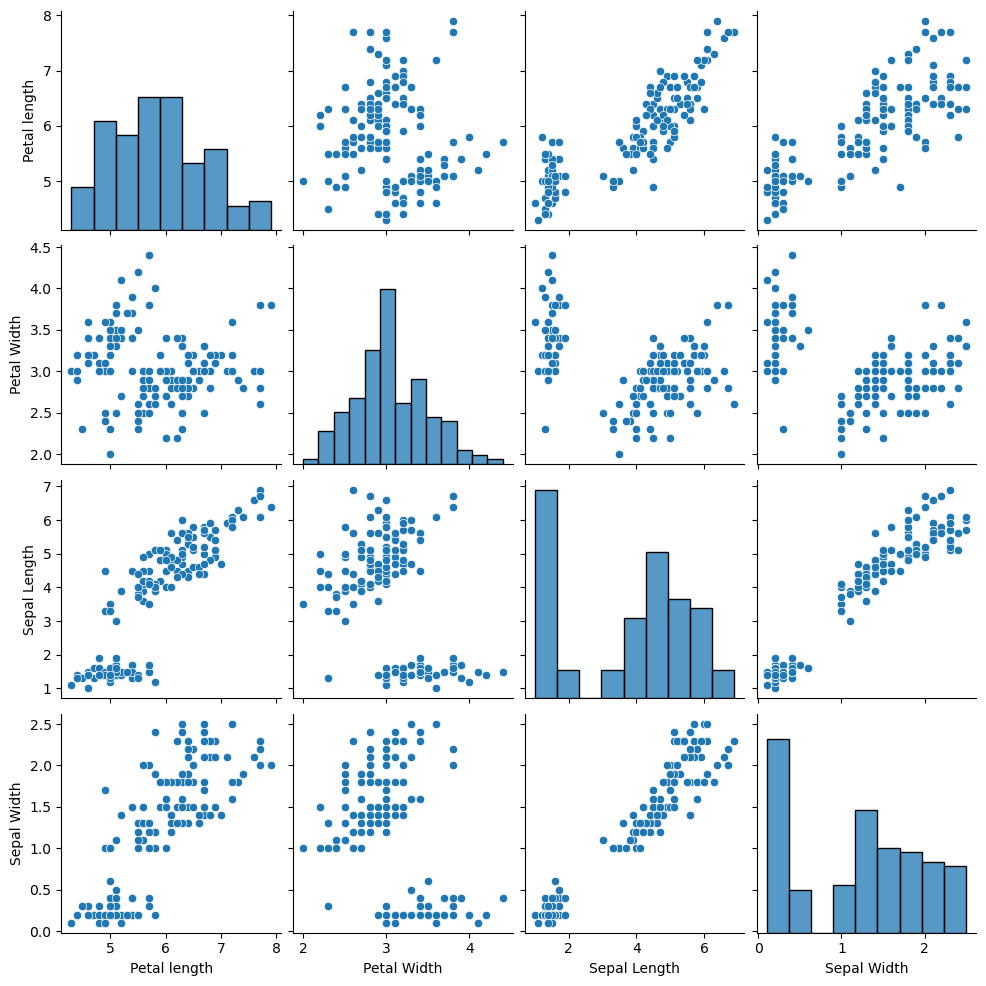

In [9]:
# Input data Visualization
sns.pairplot(data)

# Step 4 - Decision Tree Model Training

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10, test_size=0.3)

In [11]:
DTC = DecisionTreeClassifier()

In [12]:
DTC.fit(X_train, Y_train)
print("Training Complete.")

Training Complete.


In [13]:
Y_pred = DTC.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[14  0  0]
 [ 0 17  0]
 [ 0  1 13]]
0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      1.00      0.97        17
           2       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



# Step 5 - Comparing the actual and predicted flower classification

In [15]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred}) 
df 

,Actual,Predicted
0,1,1
1,2,2
2,0,0
3,1,1
4,0,0
5,1,1
6,1,1
7,1,1
8,0,0
9,1,1


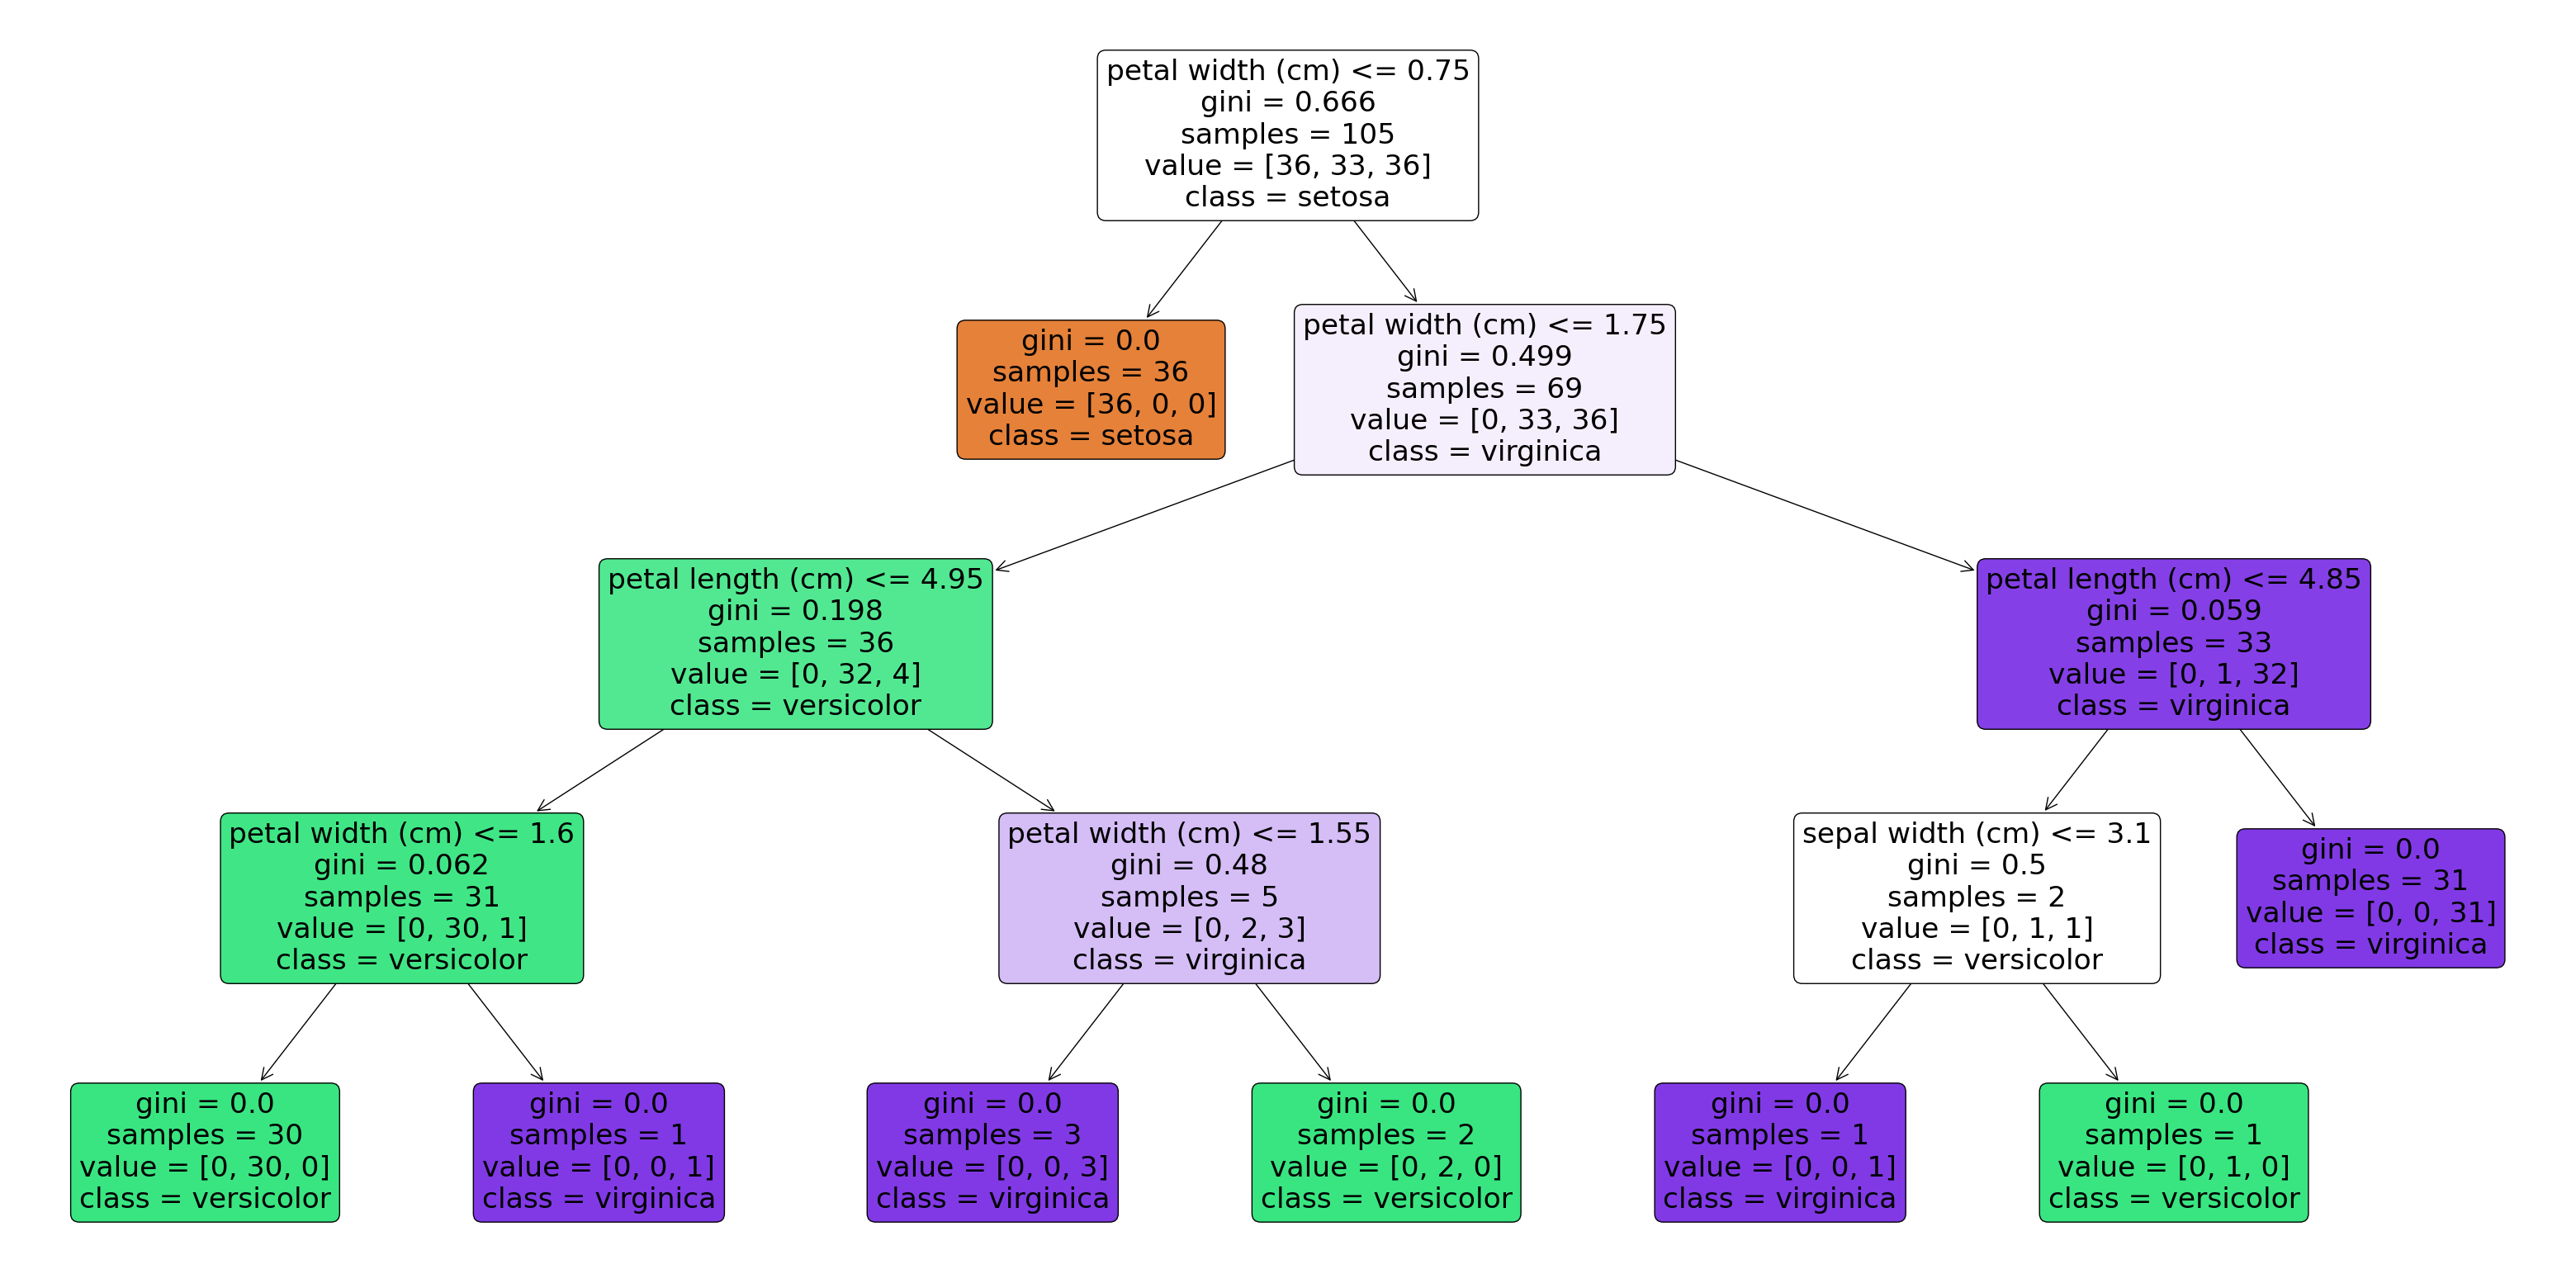

In [26]:
from sklearn import tree
plt.figure(figsize=(40,20))  
_ = tree.plot_tree(DTC,
                   feature_names = iris.feature_names[:],
                   class_names=iris.target_names,
                   rounded=True,
                   filled=True
                   )
plt.show()

# THANK YOU